# TF IDF (Term frequency - Inverse Document Frequency) 
TF-IDF merupakan salah satu metode statistik yang digunakan untuk mengukur seberapa penting suatu kata terhadap suatu dokumen tertentu dari sekumpulan dokumen, web page atau corpus.

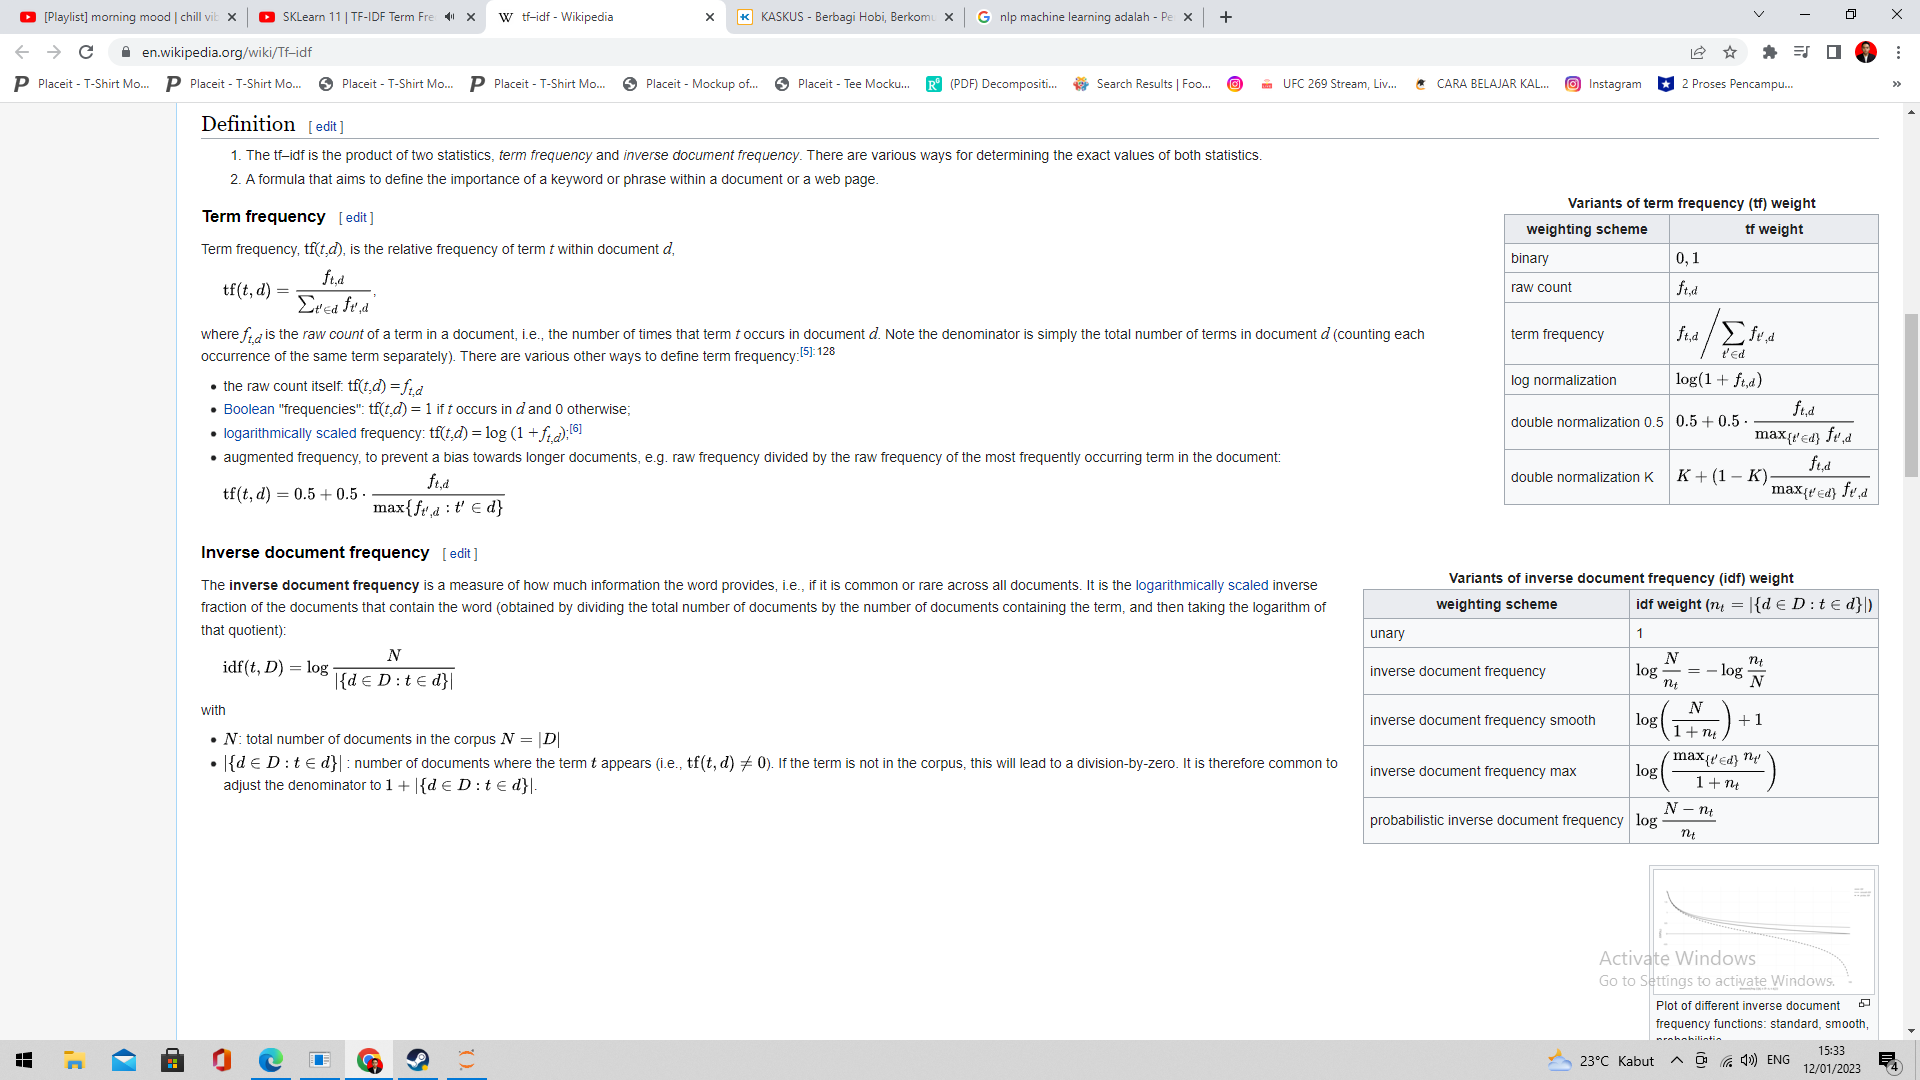

## Dataset

In [1]:
corpus = [
    'the house had a tiny little mouse',
    'the cat saw the mouse',
    'the mouse ran away from the house',
    'the cat finally ate the mouse',
    'the end of the mouse story'
]
corpus

['the house had a tiny little mouse',
 'the cat saw the mouse',
 'the mouse ran away from the house',
 'the cat finally ate the mouse',
 'the end of the mouse story']

## TF -IDF Weight 

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
response = vectorizer.fit_transform(corpus)
print(response)

  (0, 7)	0.2808823162882302
  (0, 6)	0.5894630806320427
  (0, 11)	0.5894630806320427
  (0, 5)	0.47557510189256375
  (1, 9)	0.7297183669435993
  (1, 2)	0.5887321837696324
  (1, 7)	0.3477147117091919
  (2, 1)	0.5894630806320427
  (2, 8)	0.5894630806320427
  (2, 7)	0.2808823162882302
  (2, 5)	0.47557510189256375
  (3, 0)	0.5894630806320427
  (3, 4)	0.5894630806320427
  (3, 2)	0.47557510189256375
  (3, 7)	0.2808823162882302
  (4, 10)	0.6700917930430479
  (4, 3)	0.6700917930430479
  (4, 7)	0.3193023297639811


Angka paling kiri mempresenteasikan index dari dokumen.
angka kedua dari kiri merupakan index dari token.

angka paling kanan merupakan bobot dari tf-idf



In [3]:
vectorizer.get_feature_names()

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['ate',
 'away',
 'cat',
 'end',
 'finally',
 'house',
 'little',
 'mouse',
 'ran',
 'saw',
 'story',
 'tiny']

In [4]:
response.todense()

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.4755751 , 0.58946308, 0.28088232, 0.        , 0.        ,
         0.        , 0.58946308],
        [0.        , 0.        , 0.58873218, 0.        , 0.        ,
         0.        , 0.        , 0.34771471, 0.        , 0.72971837,
         0.        , 0.        ],
        [0.        , 0.58946308, 0.        , 0.        , 0.        ,
         0.4755751 , 0.        , 0.28088232, 0.58946308, 0.        ,
         0.        , 0.        ],
        [0.58946308, 0.        , 0.4755751 , 0.        , 0.58946308,
         0.        , 0.        , 0.28088232, 0.        , 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.67009179, 0.        ,
         0.        , 0.        , 0.31930233, 0.        , 0.        ,
         0.67009179, 0.        ]])

In [12]:
import pandas as pd

df = pd.DataFrame(response.todense().T,
                    index=vectorizer.get_feature_names(),
                    columns=[f'D{i+1}' for i in range(len(corpus))])
df

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,D1,D2,D3,D4,D5
ate,0.000000,0.000000,0.000000,0.589463,0.000000
away,0.000000,0.000000,0.589463,0.000000,0.000000
cat,0.000000,0.588732,0.000000,0.475575,0.000000
end,0.000000,0.000000,0.000000,0.000000,0.670092
finally,0.000000,0.000000,0.000000,0.589463,0.000000
house,0.475575,0.000000,0.475575,0.000000,0.000000
little,0.589463,0.000000,0.000000,0.000000,0.000000
mouse,0.280882,0.347715,0.280882,0.280882,0.319302
ran,0.000000,0.000000,0.589463,0.000000,0.000000
saw,0.000000,0.729718,0.000000,0.000000,0.000000


untuk kata cat terdapat pada pada dokumen ke 2(D2) dan juga (D4) hanya saja kata cat memiliki bobot lebih tinggi pada D2 dibandingkan D4. semakin tinggi suatu bobot kata pada suatu dokumen, mengindikasikan kata tersebut semakin layak menjadi keyword/pencarian untuk dokumen tersebut.